In [81]:
import pandas as pd
import numpy as np

raw1 = pd.read_csv('C:\DATA\Suppoters_monsnato\전국_도별__논밭별_경지면적.csv', engine = 'python')
raw2 = pd.read_csv('C:\DATA\Suppoters_monsnato\국토면적.csv', engine = 'python')
raw3 = pd.read_csv('C:\DATA\Suppoters_monsnato\시군별_논밭별_경지면적_2018.csv', engine = 'python')


In [435]:
df1 = raw1[raw1.전답별 == '계']
df1 = df1.drop(0, axis = 0)

In [348]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = r'C:\DATA\Southkorea_maps\southkorea-maps\kostat\2013\json\skorea_provinces_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))


In [358]:
df1 = raw1[raw1.전답별 == '계']
df1 = df1.drop(0, axis = 0)
m = folium.Map(location=[36, 127], zoom_start=7)

folium.Choropleth(
    geo_data=geo_str,
    data = df1,
    columns=['시도별', '2018'],
    key_on='feature.properties.name',
    fill_color='YlGn',
).add_to(m)

folium.GeoJson(geo_str).add_to(m)
m.save('C:\GitHub\Supporters_monsanto\picture\논_밭_map2.html')
m

In [475]:
from pyecharts import Pie

attr = df1['시도별']
v1 = df1['2018']
pie = Pie("2018년 시도별 농지면적 비중", title_pos="center", width=600)
pie.add("B", attr, v1, center=[50, 50], is_randome=True, radius=[40, 70], rosetype='area', is_legend_show=False,
       is_label_show=True)
pie

In [361]:
df1 = raw1[raw1.전답별 == '논']
df1 = df1.drop(1, axis = 0)
m = folium.Map(location=[36, 127], zoom_start=7)

folium.Choropleth(
    geo_data=geo_str,
    data = df1,
    columns=['시도별', '2018'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
).add_to(m)

folium.GeoJson(geo_str).add_to(m)

m.save('C:\GitHub\Supporters_monsanto\picture\논_map2.html')
m

In [364]:
df1 = raw1[raw1.전답별 == '밭']
df1 = df1.drop(2, axis = 0)
df1
m = folium.Map(location=[36, 127], zoom_start=7)

folium.Choropleth(
    geo_data=geo_str,
    data = df1,
    columns=['시도별', '2018'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
).add_to(m)

folium.GeoJson(geo_str).add_to(m)

m.save('C:\GitHub\Supporters_monsanto\picture\밭_map2.html')
m

In [453]:
df2 = raw1[raw1['시도별'] == '전국']
df2.index = df2['전답별']
df2 = df2.iloc[:,16:]
df2 = df2.T

In [454]:
from pyecharts import Line, Bar

attr = df2.index
v1 = df2['논']
v2 = df2['밭']
line = Line("전국 논/밭 별 경지면적 추이 ", "1989년 ~ 2018년")
line.add("논", attr, v1, mark_line=["average"])
line.add("밭", attr, v2, mark_line=["average"])
line.add("합계", attr, v2+v1, mark_line=["average"])
line.use_theme("dark")
line.height =  400
line.width = 800
line

In [457]:
v1[0] - v1[-1]

508476

In [371]:
df3 = raw2.iloc[1,2:]
df2['국토'] = df3

In [372]:
df2 = df2.iloc[-10:,:]

In [373]:
df2['국토'] = list(map(lambda x:x.replace(",",""),df2['국토']))
df2['국토'] = df2['국토'].astype(float)

In [388]:
df3 = df2.diff()
df3 = df3.dropna()

In [389]:
index = df3.index

dfvalue1 = df3['논'].values
dfvalue2 = df3['국토'].values
_index = [i for i in df3.index.format()]

In [390]:
dfminus = []
dfplus = []

for i in dfvalue1:
    if i < 0:
        dfminus.append(i)
        dfplus.append(0)
    else:
        dfplus.append(i)
        dfminus.append(0)

In [463]:
title = "논 면적 변화량"
bar = pyecharts.Bar(title, "2010~2018")
bar.add("농지면적 증가량", _index, dfplus)
bar.add("농지면적 감소량", _index, dfminus, mark_line=["average"])
bar.height = 500
bar.width = 500
bar

In [465]:
title = "국토 면적 증가량"
bar = pyecharts.Bar(title, "2010~2018")
bar.add("국토 면적 증가량", _index, dfvalue2)
bar.height = 500
bar.width = 500
bar


In [485]:
df = raw1[raw1.전답별 == '논']
df = df.drop(1, axis = 0)
df.index = df['시도별']
df = df.iloc[-9:-1,-20:]

In [483]:
attr

Index(['경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='시도별')

In [521]:
# 지난 10년간 논경지면적 최대 감소 지역. 
import pyecharts
bar = pyecharts.Bar(title, "2008~2018")
attr = df.index
v1 = df['2008']
v2 = df['2018']
bar = Bar("2008년vs 2018년 도별 논 면적")
bar.add("2008", attr, v1)
bar.add("2018", attr, v2)
bar.height = 500
bar.width=1000
bar

In [525]:
df = raw1[raw1.전답별 == '논']
df = df.drop(1, axis = 0)
df.index = df['시도별']
df = df.iloc[-9:-1:,-30:]
tmp = ((df['2008']- df['2018'])/df['2008'])*100
tmp.sort_values()

시도별
전라남도    15.433221
충청남도    16.696667
전라북도    17.844797
경기도     18.589526
경상북도    18.891225
강원도     25.037843
경상남도    25.314715
충청북도    29.629495
dtype: float64

In [527]:
tmp = df['2008']- df['2018']
tmp.sort_values()

시도별
강원도     11413
충청북도    16258
경기도     19693
경상북도    27673
경상남도    27791
전라북도    27875
충청남도    29404
전라남도    31752
dtype: int64

In [528]:
tmp.sum()

191859

In [421]:
df = raw1[raw1.전답별 == '논']
df = df.drop(1, axis = 0)
df.index = df['시도별']
df = df.iloc[:,2:]
df = df.sum()

In [428]:
df.index = df.index.astype(int)

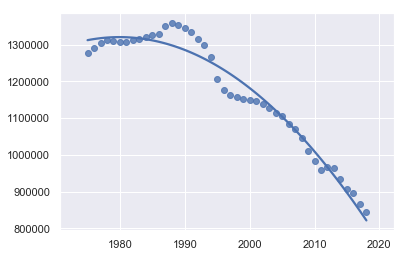

In [434]:
# 논 면적의 추세선. 

import seaborn as sns; sns.set(color_codes=True)

ax = sns.regplot(x=df.index.values, y=df.values, data=df,order=2, 
                 ci=None, truncate=True, n_boot=500)